In [162]:
!pip install wordcloud
!pip install pillow

# 1) Importando os datasets

- [Orçamento repassado pelo MEC para a UFRN 2008-2017](https://g1.globo.com/educacao/noticia/rio-grande-do-norte-veja-a-evolucao-do-orcamento-repassado-pelo-mec-as-duas-universidades-federais-do-estado.ghtml)
- [DataSets da UFRN contendo informações requisições de material, manutenção e empenhos](http://dados.ufrn.br/group/despesas-e-orcamento).
- Os cortes atingem, principalmente, os serviços terceirizados, como limpeza, manutenção e segurança, além dos benefícios para os estudantes de baixa renda, segundo reitores, estudantes e representantes de sindicatos ouvidos pelo G1 em 9 estados e no Distrito Federal [(fonte)](https://g1.globo.com/educacao/noticia/90-das-universidades-federais-tiveram-perda-real-no-orcamento-em-cinco-anos-verba-nacional-encolheu-28.ghtml).
- Essa redução de benefícios vai na contramão da Lei Federal de Cotas, de 2014, que obriga as federais a ampliar o número de calouros de escolas públicas e negros, pardos e indígenas. Na maioria das instituições, os valores das bolsas para esses alunos ou foram mantidos no mesmo valor (alguns, congelados desde 2013), ou tiveram redução. [(fonte)](https://g1.globo.com/educacao/noticia/90-das-universidades-federais-tiveram-perda-real-no-orcamento-em-cinco-anos-verba-nacional-encolheu-28.ghtml).
- Os impactos também afetam subsídios que beneficiam todos os estudantes. Nesta quinta-feira (28), a Universidade de Brasília (UnB), dobrou o preço cobrado pelo almoço no restaurante universitário. [(fonte)](https://g1.globo.com/educacao/noticia/90-das-universidades-federais-tiveram-perda-real-no-orcamento-em-cinco-anos-verba-nacional-encolheu-28.ghtml)
- Com orçamento mais enxuto, houve cortes de funcionários terceirizados em grande parte das instituições federais.
- A Universidade Federal do ABC (UFABC), em São Paulo, reduziu os contratos de vigilância e zeladoria e desligou elevadores.
- De acordo com especialistas, as universidades federais tem basicamente quatro despesas principais, sendo apenas duas obrigatórias: [Fonte](https://g1.globo.com/educacao/noticia/salario-de-professores-das-universidades-federais-e-despesa-obrigatoria-mas-auxilio-estudantil-nao-entenda-a-diferenca.ghtml)
    - Pagamento de aposentadorias e pensões – OBRIGATÓRIA
    - Pagamento de pessoal ativo – OBRIGATÓRIA: O pagamento do salário de professores e funcionários técnicos e administrativos está garantido por lei.
    - Funcionamento (custeio) – NÃO OBRIGATÓRIA: Chamadas normalmente de "custeio", essas despesas são "destinadas a manter a capacidade operacional" das universidades, segundo Tanno, e incluem, por exemplo, o pagamento da conta de luz, de água, de telefone, o pagamento de serviços terceirizados de segurança, limpeza, reformas, a manutenção de equipamentos, a compra de materiais como papel e outros programas de permanência, como as bolsas de auxílio-transporte e auxílio-alimentação dos estudantes, e bolsas de pesquisas acadêmicas. Nenhum destes gastos, porém, está garantido por lei, e dependem do direcionamento das políticas públicas, além das oscilações da economia.
    - Reestruturação e expansão (investimentos ou capital) – NÃO OBRIGATÓRIA: Os gastos de "investimento" ou "capital" são ligados às obras das universidades, como a construção de um novo laboratório ou de um prédio para abrigar os estudantes de um curso novo da instituição, ou ainda a compra de um veículo para a instituição
    
- A partir de 2018, a comparação do orçamento previsto na Lei Orçamentária Anual das universidades deixa de ser possível com os anos anteriores, já que o Ministério da Educação adotou uma nova metodologia que restringe ainda mais os gastos à "matriz Andifes".
    - Agora, ele centraliza metade dos recursos destinados às obras de expansão, reestruturação e à aquisição de equipamentos. A outra metade que será administrada pelas instituições de ensino federais será gasta da forma que elas decidirem – seja com contratações, licitações ou compra de materiais.
    
- Onde a queda de orçamento vai impactar mais na UFRN?
    - No plano de obras e na gestão. [(Entrevista com a reitora)](http://www.tribunadonorte.com.br/noticia/na-s-vamos-receber-o-ma-nimo-diz-reitora-da-ufrn/399980)

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path
%matplotlib inline

years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
budget = [62010293, 136021308, 203664331, 172999177, 221801098, 246858171, 228864259, 207579799, 230855480, 186863902]

dataset_names = ['requisicaomanutencao.csv', 'requisicaomaterialservico.csv', 'empenhos.csv']
dataset_path = 'datasets'

data = {}

for name in dataset_names:
    data[name[:-4]] = pd.read_csv(path.join(dataset_path, name), sep=';', low_memory=False)
    

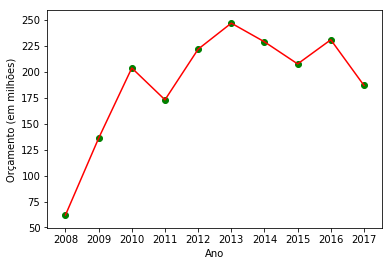

In [116]:
# Plottagem do orçamento da UFRN de 2008 a 2017, podemos perceber que caiu em todos os anos desde 2013, exceto por 2016.
budget_scaled = [value / 1000000 for value in budget]

plt.plot(years, budget_scaled, 'r')
plt.scatter(years, budget_scaled, color='green')
plt.xlabel("Ano")
plt.ylabel("Orçamento (em milhões)")
plt.xticks(years)
plt.show()

# 2) Explorando os datasets

Nessa seção é feita a análise das diferentes colunas dos datasets para identificar seus significados e suas utilidades para os problemas que iremos analisar.

## 2.1) Requisição de manutenção

Trata-se de um dataset listando todas as requisições de manutenções da UFRN desde 2005.

- numero: ID da requisição, não é relevante para o problema.

- ano: Ano em que foi feita requisição de manutenção

- divisão: Diz a divisão para qual a manutenção foi requisitada, assume os seguintes valores: 'Serviços Gerais', 'Instalações Elétricas e Telecomunicações', 'Instalações Hidráulicas e Sanitárias', 'Viário', 'Ar condicionado', 'Outros', nan.

- id_unidade_requisitante: ID da unidade que fez a requisição.

- nome_unidade_requisitante: Nome da unidade que fez a requisição.

- id_unidade_custo: ID da unidade para qual o custo será destinado (pode ser igual a requisitante).

- nome_unidade_custo: Nome da unidade para qual o custo será destinado (poder ser igual a requisitante).

- data_cadastro: Data em que a requisição foi cadastrada.

- descricao: Descrição da requisição, geralmente uma justificativa para aquela manutenção, verificar as do IMD

- local: Local exato em que será feito a manutenção, pode ser uma sala, laboratório etc

- usuario: Usuário que solicitou a manutenção. Provavelmente não tem utilidade para nosso problema.

- status: Diz o status atual da requisição. Pode ajudar na análise de custos, considerando apenas as que já foram aprovadas, comparando a proporção de aprovadas e reprovadas para cada setor.

In [117]:
maintenance_data = data['requisicaomanutencao']
print(maintenance_data.head())

   numero   ano                                   divisao  \
0    7075  2018                           Serviços Gerais   
1    7074  2018                           Serviços Gerais   
2    7073  2018                           Serviços Gerais   
3    7072  2018                           Serviços Gerais   
4    7071  2018  Instalações Elétricas e Telecomunicações   

   id_unidade_requisitante                     nome_unidade_requisitante  \
0                     1840            ASSESSORIA ADMINISTRATIVA DO CCHLA   
1                      203                      DEPARTAMENTO DE NUTRIÇÃO   
2                      389  ADMINISTRAÇÃO DO CENTRO DE CIÊNCIAS DA SAÚDE   
3                      184      DEPARTAMENTO DE BIOFÍSICA E FARMACOLOGIA   
4                      389  ADMINISTRAÇÃO DO CENTRO DE CIÊNCIAS DA SAÚDE   

   id_unidade_custo                        nome_unidade_custo data_cadastro  \
0               141                  DEPARTAMENTO DE HISTÓRIA    19/09/2018   
1               44

### Removendo colunas desnecessárias

- numero: É apenas o ID da requisição
- usuario: Não precisamos saber o usuário para nossa análise

In [118]:
def remove_cols(df_input, dropped_columns):
    for dropped_column in dropped_columns:
        if dropped_column in df_input:
            df_input = df_input.drop([dropped_column], axis=1)
    return df_input


maintenance_dropped = ['numero', 'usuario']
maintenance_data = remove_cols(maintenance_data, maintenance_dropped)
maintenance_data.head()

,ano,divisao,id_unidade_requisitante,nome_unidade_requisitante,id_unidade_custo,nome_unidade_custo,data_cadastro,descricao,local,status
0,2018,Serviços Gerais,1840,ASSESSORIA ADMINISTRATIVA DO CCHLA,141,DEPARTAMENTO DE HISTÓRIA,19/09/2018,SOLICITO PEDREIRO PARA RECOMPOR 4 AZULEJOS NA ...,SALA 801 - HISTÓRIA / PRÉDIO DO CCHLA,PENDENTE AUTORIZAÇÃO DIREÇÃO CENTRO
1,2018,Serviços Gerais,203,DEPARTAMENTO DE NUTRIÇÃO,441,CENTRO DE CIÊNCIAS DA SAÚDE,19/09/2018,É NECESSÁRIO PINTOR PARA COMPLEMENTAR SERVIÇO ...,Lab de Educação Alimentar,ENVIADA
2,2018,Serviços Gerais,389,ADMINISTRAÇÃO DO CENTRO DE CIÊNCIAS DA SAÚDE,441,CENTRO DE CIÊNCIAS DA SAÚDE,19/09/2018,SOLICITAMOS CONSERTO DE VAZAMENTO DE INFILTRAÇ...,CCS/Sala de convivência dos alunos do Curso de...,EM ROTA VISITA
3,2018,Serviços Gerais,184,DEPARTAMENTO DE BIOFÍSICA E FARMACOLOGIA,184,DEPARTAMENTO DE BIOFÍSICA E FARMACOLOGIA,19/09/2018,É NECESSÁRIO PINTOR PARA COMPLEMENTAR SERVIÇO ...,DEPARTAMENTO DE BIOFÍSICA E FARMACOLOGIA/ LABO...,ENVIADA
4,2018,Instalações Elétricas e Telecomunicações,389,ADMINISTRAÇÃO DO CENTRO DE CIÊNCIAS DA SAÚDE,441,CENTRO DE CIÊNCIAS DA SAÚDE,19/09/2018,"SOLICITAMOS INSTALAÇÃO DE REDE ELÉTRICA, COM P...",CCS/Sala de convivência dos alunos do Curso de...,PEDIDO MATERIAL REALIZADO


In [119]:
print(maintenance_data.status.value_counts())

FINALIZADA                             67211
AGUARDANDO_EXECUCAO                     3649
ATENDIDA                                1471
NEGADA                                  1383
AUTORIZADA                               957
CADASTRADA                               794
EM ROTA VISITA                           759
ESTORNADA                                743
AGUARDANDO VISITA                        685
PEDIDO MATERIAL REALIZADO                679
AGUARDANDO AVALIAÇÃO REQUISITANTE        610
ENVIADA                                  522
SERVIÇO AVALIADO                         199
SERVIÇO NÃO EXECUTADO                    143
PENDENTE AUTORIZAÇÃO CHEFE UNIDADE       104
ARQUIVADA                                 84
EM_EXECUCAO                               67
AGUARDANDO MATERIAL                       54
MATERIAL RECEBIDO                         53
ATENDIDA DIMAN                            48
PENDENTE AUTORIZAÇÃO CHEFIA               41
RETORNADA                                 39
AGUARDANDO

In [120]:
# Checando os status, podemos perceber que a maioria dos valores ocorrem um número muito pequeno de vezes e não precisamos
# deles para nossa análise, portanto iremos eliminar os valores com 800 ocorrências ou menos
maintenance_data = maintenance_data.groupby('status').filter(lambda x: len(x) > 800)
maintenance_data.status.value_counts()

FINALIZADA             67211
AGUARDANDO_EXECUCAO     3649
ATENDIDA                1471
NEGADA                  1383
AUTORIZADA               957
Name: status, dtype: int64

In [121]:
# Sobram portanto 5 valores possíveis para status. Porém, para nossa análise de custos, precisamos apenas saber se a
# requisição foi negada ou autorizada, portanto toda requisição que tiver valor diferente de negada será considerada
# como autorizada.
def convert_status(status_val):
    if status_val == 'NEGADA':
        return status_val
    else:
        return 'AUTORIZADA'

maintenance_data['status'] = maintenance_data['status'].apply(convert_status)
maintenance_data.status.value_counts()

AUTORIZADA    73288
NEGADA         1383
Name: status, dtype: int64

In [122]:
maintenance_data.info()
print(maintenance_data.divisao.value_counts())
print(maintenance_data.nome_unidade_custo.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74671 entries, 13 to 80339
Data columns (total 10 columns):
ano                          74671 non-null int64
divisao                      74652 non-null object
id_unidade_requisitante      74671 non-null int64
nome_unidade_requisitante    74671 non-null object
id_unidade_custo             74671 non-null int64
nome_unidade_custo           74671 non-null object
data_cadastro                74671 non-null object
descricao                    74671 non-null object
local                        53327 non-null object
status                       74671 non-null object
dtypes: int64(3), object(7)
memory usage: 6.3+ MB
Serviços Gerais                             21978
Instalações Elétricas e Telecomunicações    19376
Outros                                      17501
Instalações Hidráulicas e Sanitárias        15265
Viário                                        485
Ar condicionado                                47
Name: divisao, dtype: int64
CENTR

In [123]:
# Utilizando o método info percebemos que existem muitos valores NULL na coluna local e alguns na 
# coluna divisao. Iremos preencher as linhas com local nulo com seus valores de nome_unidade_custo,
# e divisao com serviços gerais, que é o valor mais comum.
import numpy as np

maintenance_data['local'] = np.where(maintenance_data.local.isnull(), maintenance_data.nome_unidade_custo, maintenance_data.local)
maintenance_data['divisao'] = maintenance_data['divisao'].fillna('Serviços Gerais')

maintenance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74671 entries, 13 to 80339
Data columns (total 10 columns):
ano                          74671 non-null int64
divisao                      74671 non-null object
id_unidade_requisitante      74671 non-null int64
nome_unidade_requisitante    74671 non-null object
id_unidade_custo             74671 non-null int64
nome_unidade_custo           74671 non-null object
data_cadastro                74671 non-null object
descricao                    74671 non-null object
local                        74671 non-null object
status                       74671 non-null object
dtypes: int64(3), object(7)
memory usage: 6.3+ MB


## 2.2) Requisição de material de serviço

Esse dataset lista todas as requisições de materiais e serviços contratados pela UFRN desde 2008.

- numero: ID da requisição, não é relevante.

- ano: Ano em que foi feita a requisição.

- id_unidade_requisitante: ID da unidade que fez a requisição, toda unidade tem um ID único, pode ser usado para JOIN.

- nome_unidade_requisitante: Nome da unidade que fez a requisição.

- id_unidade_Custo: ID da unidade para qual os custos serão destinados, pode ser diferente da requisitante.

- nome_unidade_custo: Nome da unidade para qual os custos serão destinados, pode ser diferente da requisitante.

- data_envio: Data em que a requisição foi enviada.

- numero_contrato: Aparentemente as requisições são feitas por meio de contratos, esse é o número do contrato.

- contratado: Empresa contratada para fornecer o material.

- natureza_despesa: Sempre para pessoa jurídica, talvez não tenha utilidade.

- valor: Valor pedido pela requisição.

- observacoes: Comentário feito pela pessoa que fez a requisição, explicando o motivo desta

- status: O status atual da requisição, está diretamente ligada ao empenho e pode assumir os seguintes valores: 'ENVIADA', 'PENDENTE ATENDIMENTO', 'CADASTRADA', 'ESTORNADA', 'LIQUIDADA', 'PENDENTE AUTORIZAÇÃO', 'FINALIZADA', 'EM_LIQUIDACAO', 'NEGADA', 'A_EMPENHAR', 'EMPENHO_ANULADO', 'AUTORIZADA', 'CANCELADA\n'.

In [124]:
material_request_data = data['requisicaomaterialservico']
print(material_request_data.head())


   numero   ano  id_unidade_requisitante  \
0    1786  2018                      160   
1    1785  2018                     2640   
2    1784  2018                     1481   
3    1783  2018                     6799   
4    1782  2018                     4894   

              nome_unidade_requisitante  id_unidade_custo  \
0      DEPARTAMENTO DE ECONOMIA - DEPEC               434   
1  SETOR DE COMPRAS E MANUTENÇÃO - CCSA              2640   
2              PRÓ-REITORIA DE PESQUISA              1481   
3                 FNDE - PRONATEC - EAJ              6799   
4             DEPARTAMENTO DE GEOFÍSICA              4894   

                      nome_unidade_custo  data_envio numero_contrato  \
0  PROGRAMA DE PÓS-GRADUAÇÃO EM ECONOMIA  19/09/2018         60/2014   
1   SETOR DE COMPRAS E MANUTENÇÃO - CCSA  18/09/2018         25/2018   
2               PRÓ-REITORIA DE PESQUISA  18/09/2018         60/2014   
3                  FNDE - PRONATEC - EAJ  18/09/2018         18/2015   
4       

### Removendo colunas desnecessárias

As seguintes colunas serão dropadas

- numero: Trata-se apenas do ID da requisição, não é necessário.

- numero_contrato: Informação desnecessária para a análise

- natureza_despesa: Sempre possui o mesmo valor

In [125]:
material_dropped = ['numero' ,'natureza_despesa', 'numero_contrato']
material_request_data = remove_cols(material_request_data, material_dropped)

print(material_request_data.head())

    ano  id_unidade_requisitante             nome_unidade_requisitante  \
0  2018                      160      DEPARTAMENTO DE ECONOMIA - DEPEC   
1  2018                     2640  SETOR DE COMPRAS E MANUTENÇÃO - CCSA   
2  2018                     1481              PRÓ-REITORIA DE PESQUISA   
3  2018                     6799                 FNDE - PRONATEC - EAJ   
4  2018                     4894             DEPARTAMENTO DE GEOFÍSICA   

   id_unidade_custo                     nome_unidade_custo  data_envio  \
0               434  PROGRAMA DE PÓS-GRADUAÇÃO EM ECONOMIA  19/09/2018   
1              2640   SETOR DE COMPRAS E MANUTENÇÃO - CCSA  18/09/2018   
2              1481               PRÓ-REITORIA DE PESQUISA  18/09/2018   
3              6799                  FNDE - PRONATEC - EAJ  18/09/2018   
4              4894              DEPARTAMENTO DE GEOFÍSICA  18/09/2018   

                                 contratado   valor  \
0  PRAIAMAR EMPREENDIMENTOS TURISTICOS LTDA   290.0   


In [126]:
print(material_request_data.status.value_counts())

LIQUIDADA               11645
EM_LIQUIDACAO            5988
ENVIADA                  5335
ESTORNADA                2856
FINALIZADA               1543
CADASTRADA                695
A_EMPENHAR                144
EMPENHO_ANULADO           139
NEGADA                    136
PENDENTE ATENDIMENTO       45
PENDENTE AUTORIZAÇÃO       37
AUTORIZADA                 36
CANCELADA\n                 1
Name: status, dtype: int64


In [127]:
allowed_status = ['LIQUIDADA', 'EM_LIQUIDACAO', 'ENVIADA', 'ESTORNADA', 'FINALIZADA', 'CADASTRADA']
material_request_data = material_request_data[material_request_data.status.isin(allowed_status)]

print(material_request_data.status.value_counts())

LIQUIDADA        11645
EM_LIQUIDACAO     5988
ENVIADA           5335
ESTORNADA         2856
FINALIZADA        1543
CADASTRADA         695
Name: status, dtype: int64


In [128]:
material_request_data.info()
material_request_data[material_request_data.data_envio.isnull()].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28062 entries, 0 to 28599
Data columns (total 10 columns):
ano                          28062 non-null int64
id_unidade_requisitante      28062 non-null int64
nome_unidade_requisitante    28062 non-null object
id_unidade_custo             28062 non-null int64
nome_unidade_custo           28062 non-null object
data_envio                   20202 non-null object
contratado                   28062 non-null object
valor                        28062 non-null float64
observacoes                  20161 non-null object
status                       28062 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 2.4+ MB


,ano,id_unidade_requisitante,nome_unidade_requisitante,id_unidade_custo,nome_unidade_custo,data_envio,contratado,valor,observacoes,status
11,2018,275,DMP - SECRETARIA ADMINISTRATIVA,275,DMP - SECRETARIA ADMINISTRATIVA,NaN,INSTRUCON COMÉRCIO E SERVIÇOS LTDA - ME,292.00000,SPLIT 36.000 SETOR DE COMPRAS,CADASTRADA
12,2018,275,DMP - SECRETARIA ADMINISTRATIVA,275,DMP - SECRETARIA ADMINISTRATIVA,NaN,INSTRUCON COMÉRCIO E SERVIÇOS LTDA - ME,641.00000,SPLIT 12.000 DIREÇAO/DMP,CADASTRADA
31,2018,424,DEPARTAMENTO DE ENGENHARIA TÊXTIL,424,DEPARTAMENTO DE ENGENHARIA TÊXTIL,NaN,PRAIAMAR EMPREENDIMENTOS TURISTICOS LTDA,234.22222,NaN,CADASTRADA
61,2018,5579,PROGRAMA DE PÓS-GRADUAÇÃO EM SISTEMÁTICA E EVO...,5579,PROGRAMA DE PÓS-GRADUAÇÃO EM SISTEMÁTICA E EVO...,NaN,PRAIAMAR EMPREENDIMENTOS TURISTICOS LTDA,290.00000,Translado solicitado para Alexandre Marcos Ant...,ESTORNADA
155,2018,195,DEPARTAMENTO DE ODONTOLOGIA,195,DEPARTAMENTO DE ODONTOLOGIA,NaN,PRAIAMAR EMPREENDIMENTOS TURISTICOS LTDA,2319.94000,NaN,CADASTRADA


In [130]:
# A data de envio possui vários valores nulos separados pelo dataset, e algumas observações tambem tem valores nulos.
# Para as datas, iremos settar seus valores para a data válida mais próxima, já para observacoes, iremos simplesmente
# settar os valores para uma string vazia.

material_request_data.data_envio = material_request_data.data_envio.fillna(method='ffill')
material_request_data.observacoes = material_request_data.observacoes.fillna('')

material_request_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28062 entries, 0 to 28599
Data columns (total 10 columns):
ano                          28062 non-null int64
id_unidade_requisitante      28062 non-null int64
nome_unidade_requisitante    28062 non-null object
id_unidade_custo             28062 non-null int64
nome_unidade_custo           28062 non-null object
data_envio                   28062 non-null object
contratado                   28062 non-null object
valor                        28062 non-null float64
observacoes                  28062 non-null object
status                       28062 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 2.4+ MB


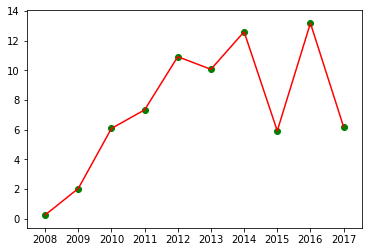

In [131]:
# Considerando que o orçamento começou a diminuir em 2013, ainda tivemos picos de gasto em materiais em 2013 e 2016, porém
# também tivemos grandes baixas em 2015 e 2017 que são justamente os dois anos que tiveram as maiores baixas de orçamento,
# indicando que a UFRN pode ter sofrido pelo corte de gastos.

material_spending = []
for year in years:
    material_spending.append(material_request_data[material_request_data.ano == year].valor.sum() / 1000000)

plt.plot(years, material_spending, 'r')
plt.scatter(years, material_spending, color='green')
plt.xticks(years)
plt.show()

## 2.3) Empenhos

Dataset contendo a relação de todos os empenhos efetuados pela UFRN desde 2001.

O empenho da despesa importa em deduzir do saldo de determinada dotação orçamentária a parcela necessária à execução das atividades do órgão. É a forma de comprometimento de recursos orçamentários. Nenhuma despesa poderá ser realizada sem prévio empenho (art. 60 da Lei n° 4.320/64), sendo realizado após autorização do Ordenador de Despesa em cada Unidade Gestora Executora.

- cod_empenho: ID do empenho, talvez possa ser DROPADO.

- ano: Ano em que foi solicitado o empenho.

- modalidade: O empenho da despesa pode assumir três tipos diferentes: 
    - a) Ordinário – a despesa com valor exato deve ser liquidada e paga de uma única vez;
    - b) Estimativo – O valor total da despesa é estimado, podendo ser liquidado e pago em parcelas mensais;
    - c) Global – a despesa total é conhecida e seu pagamento é parcelado, de acordo com cronograma de execução. 

- id_unidade_getora: ID da unidade orçamentária ou administrativa investida de poder para gerir créditos orçamentários e/ou recursos financeiros

- nome_unidade_gestora: Nome da unidade orçamentária ou administrativa investida de poder para gerir créditos orçamentários e/ou recursos financeiros

- data: Data em que foi feito o empenho

- programa_trabalho_resumido: Resumo do programa/trabalho para qual o empenho será destinado

- fonte_recurso: De onde vem os recursos usados no empenho

- plano_interno: Plano associado ao orçamento de um órgão

- esfera: Pode assumir os seguintes valores: 'FISCAL', 'SEGURIDADE', 'INVESTIMENTO', 'CUSTEIO';

- natureza_despesa: Para que tipo de obra foi feito o empenho. Podemos verificar a despesa para desenvolvimento de software, entre os valores dessas colunas temos: 'MAT. CONSUMO', 'SERV. PESSOA JURÍDICA', 'EQUIP. MATERIAL PERMANENTE', 'OBRAS E INSTALAÇÕES', 'PASSAGENS', 'SERVIÇOS DE TECNOLOGIA DA INFORMAÇÃO E COMUNICAÇÃO', 'DESENVOLVIMENTO DE SOFTWARE', 'DIV.EXERCÍCIOS ANTERIORES', 'SERV. PESSOA FÍSICA' 'LOC. MÃO-DE-OBRA', 'SERVIÇOS / UG-GESTÃO' etc.

- creador: O beneficiário do empenho

- valor_empenho: Valor total do empenho

- valor_reforcado: O Empenho poderá ser reforçado quando o valor empenhado for insuficiente para atender à despesa a ser realizada, e caso o valor do empenho exceda o montante da despesa realizada, o empenho deverá ser anulado parcialmente. Será anulado totalmente quando o objeto do contrato não tiver sido cumprido, ou ainda, no caso de ter sido emitido incorretamente. Portanto este se trata de um valor adicional ao valor inicial.   MUITOS VALORES NULL

- valor_anulado: Semelhante ao valor cancelado MUITOS VALORES NULL

- valor_cancelado: Valor do empenho que foi cancelado em relação ao total MUITOS VALORES NULL   DROPAR

- saldo_empenho: Valor final do empenho

- processo: Número do processo do empenho    DROPAR

- documento_associado: Documento associado ao processo    DROPAR

- licitacao:   DROPAR

- convenio:   DROPAR (?) talvez JOIN com outro dataset 

- observacoes:  DROPAR


In [133]:
empenhos_data = data['empenhos']
empenhos_cancelados = empenhos_data[empenhos_data.documento_associado.notnull()]

print(empenhos_data.head())

   cod_empenho   ano  modalidade  id_unidade_gestora  \
0      8000116  2018   ordinário                 440   
1       803463  2018  estimativo                 605   
2       803457  2018   ordinário                 605   
3       803449  2018   ordinário                 605   
4       803448  2018   ordinário                 605   

                          nome_unidade_gestora        data  \
0                        CENTRO DE BIOCIÊNCIAS  29/08/2018   
1  UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE  19/09/2018   
2  UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE  19/09/2018   
3  UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE  19/09/2018   
4  UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE  19/09/2018   

                          programa_trabalho_resumido  \
0  FUNCIONAMENTO DE INSTITUIÇÕES FEDERAIS DE ENSI...   
1  FUNCIONAMENTO DE INSTITUIÇÕES FEDERAIS DE EDUC...   
2  CAPES - APOIO A CAPACITAÇÃO E FORMAÇÃO INICIAL...   
3  CAPES - APOIO A CAPACITAÇÃO E FORMAÇÃO INICIAL...   
4  CAPES -

### Removendo colunas desnecessárias

- cod_empenho: Trata-se apenas do ID do empenho, não é necessário
- processo: Não adiciona informação relevante ao estudo
- documento_associado: Não adiciona informação relevante ao estudo
- licitacao: Não adiciona informação relevante ao estudo
- convenio: Não adiciona informação relevante ao estudo
- observacoes: Não adiciona informação relevante ao estudo


Podemos observar também diversas colunas com valores nulos ou repetidos, que serão investigadas mais a fundo.

In [153]:
empenhos_dropped = ['cod_empenho', 'processo', 'documento_associado', 'licitacao', 'convenio', 'observacoes']
empenhos_data = remove_cols(empenhos_data, empenhos_dropped)

print(empenhos_data.head())

       ano modalidade  id_unidade_gestora  \
4809  2017     global                 605   
4810  2017     global                 605   
4811  2017  ordinário                 605   
4812  2017  ordinário                 605   
4813  2017  ordinário                 605   

                             nome_unidade_gestora        data  \
4809  UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE  29/12/2017   
4810  UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE  29/12/2017   
4811  UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE  29/12/2017   
4812  UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE  29/12/2017   
4813  UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE  29/12/2017   

                             programa_trabalho_resumido        fonte_recurso  \
4809  MTPS - FOMENTO E FORTALECIMENTO DA ECONOMIA NA...  TESOURO - ORDINÁRIO   
4810  MTPS - FOMENTO E FORTALECIMENTO DA ECONOMIA NA...  TESOURO - ORDINÁRIO   
4811     REESTRUTURA E EXPANSÃO DAS IFES - CONSOLIDAÇÃO   TESOURO - EDUCAÇÃO   
4812     REESTRUTU

In [146]:
# O dataset de empenhos nos dá valores desde 2001 até 2018, porém estamos trabalhando com dados de 2008 a 2018, logo
# podemos remover empenhos anteriores a 2008

empenhos_data = empenhos_data[empenhos_data.ano.isin(years)]

In [151]:
empenhos_data.info()

empenhos_data[empenhos_data.valor_anulado.notnull()].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158860 entries, 4809 to 163668
Data columns (total 16 columns):
ano                           158860 non-null int64
modalidade                    158860 non-null object
id_unidade_gestora            158860 non-null int64
nome_unidade_gestora          158860 non-null object
data                          158860 non-null object
programa_trabalho_resumido    158860 non-null object
fonte_recurso                 158860 non-null object
plano_interno                 158860 non-null object
esfera                        158860 non-null object
natureza_despesa              158860 non-null object
credor                        158860 non-null object
valor_empenho                 158860 non-null float64
valor_reforcado               3321 non-null float64
valor_anulado                 8851 non-null float64
valor_cancelado               4620 non-null float64
saldo_empenho                 158860 non-null float64
dtypes: float64(5), int64(2), object(9)
m

,ano,modalidade,id_unidade_gestora,nome_unidade_gestora,data,programa_trabalho_resumido,fonte_recurso,plano_interno,esfera,natureza_despesa,credor,valor_empenho,valor_reforcado,valor_anulado,valor_cancelado,saldo_empenho
4840,2017,estimativo,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,26/03/2018,FUNCIONAMENTO DE INSTITUIÇÕES FEDERAIS DE ENSI...,FUNCIONAMENTO DAS INSTITUIÇÕES FEDERAIS,UFRN - GESTAO DA UNIDADE/ FUNCIONAMENTO DOS CU...,FISCAL,SERV. PESSOA JURÍDICA,INSTRUCON COMÉRCIO E SERVIÇOS LTDA - ME,15000.00,10540.0,10540.00,NaN,8596.0
4909,2017,ordinário,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,21/12/2017,FUNCIONAMENTO DE INSTITUIÇÕES FEDERAIS DE ENSI...,TESOURO - EDUCAÇÃO,UFRN - GESTAO DA UNIDADE/ FUNCIONAMENTO DOS CU...,FISCAL,SERV. PESSOA JURÍDICA,TOTAL MULTIMIDIA LOCAÇÃO E EVENTOS LTDA-ME,1710.00,NaN,1710.00,NaN,0.0
5010,2017,ordinário,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,14/12/2017,FUNCIONAMENTO DE INSTITUIÇÕES FEDERAIS DE ENSI...,TESOURO - EDUCAÇÃO,UFRN - OBRAS REFORMA - FUNCIONAMENTO DOS CURSO...,FISCAL,SERV. PESSOA JURÍDICA,HABITE-SE PROJETOS E EXECUÇÕES LTDA ME,34139.95,NaN,34139.95,NaN,0.0
5148,2017,ordinário,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,30/11/2017,FUNCIONAMENTO DE INSTITUIÇÕES FEDERAIS DE ENSI...,TESOURO - EDUCAÇÃO,UFRN - GESTAO DA UNIDADE/ FUNCIONAMENTO DOS CU...,FISCAL,SERV. PESSOA JURÍDICA,LM SERVGRAFICA E COPIADORA LTDA - ME,11017.00,NaN,11017.00,NaN,0.0
5156,2017,ordinário,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,30/11/2017,FUNCIONAMENTO DE INSTITUIÇÕES FEDERAIS DE ENSI...,TESOURO - EDUCAÇÃO,UFRN - GESTAO DA UNIDADE/ FUNCIONAMENTO DOS CU...,FISCAL,MAT. CONSUMO,EUFORIA CONFECCAO E SERVICOS EIRELI - ME,2202.90,NaN,2202.90,NaN,0.0


In [154]:
# Temos uma quantidade muito baixa de valores não nulos para valor_reforcado, valor_anulado e valor_cancelado, e não são
# colunas que precisamos manter para fazermos nossa análise, portanto nós iremos removê-las.

valores_drop = ['valor_reforcado', 'valor_anulado', 'valor_cancelado']
empenhos_data = remove_cols(empenhos_data, valores_drop)

empenhos_data.head()

,ano,modalidade,id_unidade_gestora,nome_unidade_gestora,data,programa_trabalho_resumido,fonte_recurso,plano_interno,esfera,natureza_despesa,credor,valor_empenho,saldo_empenho
4809,2017,global,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,29/12/2017,MTPS - FOMENTO E FORTALECIMENTO DA ECONOMIA NA...,TESOURO - ORDINÁRIO,MT - TED SENAES,FISCAL,SERV. PESSOA JURÍDICA,FUNDAÇÃO NORTE-RIO-GRANDENSE DE PESQUISA E CUL...,22727.27,8264.48
4810,2017,global,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,29/12/2017,MTPS - FOMENTO E FORTALECIMENTO DA ECONOMIA NA...,TESOURO - ORDINÁRIO,MT - TED SENAES,FISCAL,SERV. PESSOA JURÍDICA,FUNDAÇÃO NORTE-RIO-GRANDENSE DE PESQUISA E CUL...,177272.73,0.00
4811,2017,ordinário,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,29/12/2017,REESTRUTURA E EXPANSÃO DAS IFES - CONSOLIDAÇÃO,TESOURO - EDUCAÇÃO,UFRN-GESTAO DA UNIDADE :PDE - RESTRUTURACAO E ...,FISCAL,EQUIP. MATERIAL PERMANENTE,NADJA MARINA PIRES - EPP,2699.00,2699.00
4812,2017,ordinário,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,29/12/2017,REESTRUTURA E EXPANSÃO DAS IFES - CONSOLIDAÇÃO,TESOURO - EDUCAÇÃO,UFRN-GESTAO DA UNIDADE :PDE - RESTRUTURACAO E ...,FISCAL,EQUIP. MATERIAL PERMANENTE,CCK COMERCIAL EIRELI,322.88,322.88
4813,2017,ordinário,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,29/12/2017,REESTRUTURA E EXPANSÃO DAS IFES - CONSOLIDAÇÃO,TESOURO - EDUCAÇÃO,UFRN-GESTAO DA UNIDADE :PDE - RESTRUTURACAO E ...,FISCAL,EQUIP. MATERIAL PERMANENTE,DIGISERVI TRADING LTDA - ME,540.47,540.47


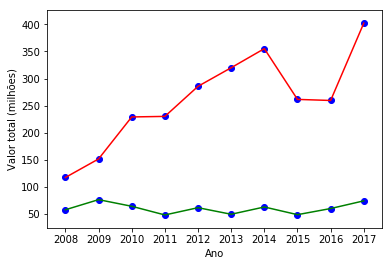

In [160]:
valor_year = []
saldo_year = []

for year in years:
    valor_year.append(empenhos_data[empenhos_data.ano == year].valor_empenho.sum() / 1000000)
    saldo_year.append(empenhos_data[empenhos_data.ano == year].saldo_empenho.sum() / 1000000)
    
plt.plot(years, valor_year, 'r', label='Valor pedido')
plt.plot(years, saldo_year, 'g', label='Saldo autorizado')
plt.scatter(years, valor_year, color='blue')
plt.scatter(years, saldo_year, color='blue')

plt.xlabel('Ano')
plt.ylabel('Valor total (milhões)')
plt.xticks(years)

plt.show()